In [1]:
from collections import deque
import copy
import heapq
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from tabulate import tabulate
import time

In [2]:
def random_graph(num_vertices, num_edges):
    adjacency_matrix = [[0] * num_vertices for _ in range(num_vertices)]
    adjacency_list = {i: dict() for i in range(num_vertices)}
    
    while num_edges:
        i = np.random.randint(0, num_vertices)
        j = np.random.randint(0, num_vertices)
        if i == j or adjacency_matrix[i][j]:
            continue
        weight = np.random.randint(1, 11)
        adjacency_matrix[i][j] = adjacency_matrix[j][i] = weight
        adjacency_list[i][j] = weight
        adjacency_list[j][i] = weight
        num_edges -= 1
        
    return adjacency_matrix, adjacency_list

### Generate random graph

In [3]:
num_vertices = 100
num_edges = 500

adjacency_matrix, adjacency_list = random_graph(num_vertices, num_edges)

In [4]:
nx_graph = nx.Graph() 

for i in range(num_vertices):
    nx_graph.add_node(i)
    for j in range(i + 1):
        if adjacency_matrix[i][j]:
            nx_graph.add_edge(i, j, weight=adjacency_matrix[i][j])

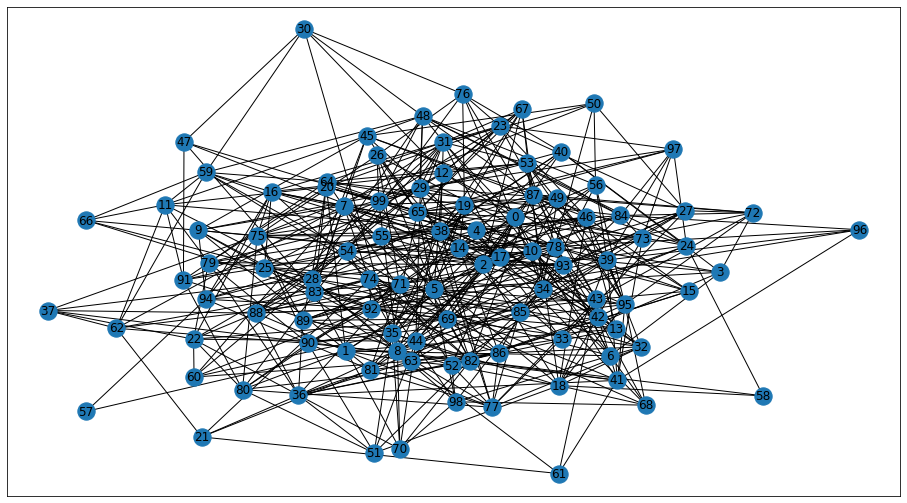

In [5]:
plt.figure(figsize=(16, 9))
nx.draw_networkx(nx_graph)
plt.show()

### Dijkstra's algorithm

In [6]:
def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    predecessor = {node: None for node in graph}

    priority_queue = [(0, start)]
    while len(priority_queue) > 0:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessor[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))
                
    paths = {node: deque() for node in graph}
    for target in graph:
        current_node = target
        while current_node is not None:
            paths[target].appendleft(current_node)
            current_node = predecessor[current_node]

    return distances, paths

#### example

In [7]:
start_node = np.random.randint(0, num_vertices)
print(f'Start node: {start_node}\n')

lengths, paths = dijkstra(adjacency_list, start_node)
paths = {key: list(value) for key, value in paths.items()}

print(f'Lengths:')
for key, value in lengths.items():
    print(f'{key}: {value}')

print(f'\nPaths:')
for key, value in paths.items():
    print(f'{key}:\t{value}')

Start node: 98

Lengths:
0: 5
1: 7
2: 8
3: 9
4: 9
5: 8
6: 5
7: 9
8: 7
9: 8
10: 7
11: 14
12: 9
13: 8
14: 9
15: 6
16: 9
17: 4
18: 8
19: 7
20: 10
21: 13
22: 7
23: 4
24: 7
25: 9
26: 9
27: 6
28: 7
29: 10
30: 8
31: 8
32: 6
33: 9
34: 4
35: 8
36: 7
37: 8
38: 8
39: 9
40: 9
41: 7
42: 7
43: 9
44: 9
45: 6
46: 7
47: 9
48: 7
49: 8
50: 9
51: 8
52: 3
53: 8
54: 8
55: 11
56: 6
57: 17
58: 9
59: 10
60: 9
61: 12
62: 10
63: 5
64: 7
65: 3
66: 12
67: 7
68: 8
69: 7
70: 6
71: 9
72: 8
73: 11
74: 8
75: 7
76: 5
77: 9
78: 11
79: 5
80: 7
81: 8
82: 4
83: 8
84: 8
85: 9
86: 9
87: 6
88: 9
89: 8
90: 9
91: 10
92: 9
93: 6
94: 10
95: 7
96: 8
97: 5
98: 0
99: 9

Paths:
0:	[98, 65, 17, 0]
1:	[98, 52, 63, 1]
2:	[98, 52, 63, 2]
3:	[98, 65, 97, 19, 5, 3]
4:	[98, 65, 23, 46, 4]
5:	[98, 65, 97, 19, 5]
6:	[98, 6]
7:	[98, 34, 79, 93, 9, 7]
8:	[98, 70, 8]
9:	[98, 34, 79, 93, 9]
10:	[98, 65, 10]
11:	[98, 34, 79, 11]
12:	[98, 70, 8, 30, 12]
13:	[98, 52, 63, 36, 13]
14:	[98, 70, 8, 49, 14]
15:	[98, 52, 82, 15]
16:	[98, 65, 23, 16]
17:	[9

### Bellman–Ford algorithm

In [8]:
def bellman_ford(graph, source):
    distance = {node: float('inf') for node in graph}
    distance[source] = 0
    predecessor = {node: None for node in graph}

    for _ in range(len(graph) - 1):
        for node in graph:
            for neighbour in graph[node]:
                if distance[neighbour] > distance[node] + graph[node][neighbour]:
                    distance[neighbour], predecessor[neighbour] = distance[node] + graph[node][neighbour], node

    for node in graph:
        for neighbour in graph[node]:
            assert distance[neighbour] <= distance[node] + graph[node][neighbour], "Negative weight cycle."
            
    paths = {node: deque() for node in graph}
    for target in graph:
        current_node = target
        while current_node is not None:
            paths[target].appendleft(current_node)
            current_node = predecessor[current_node]
 
    return distance, paths

#### example

In [9]:
start_node = np.random.randint(0, num_vertices)
print(f'Start node: {start_node}\n')

lengths, paths = bellman_ford(adjacency_list, start_node)
paths = {key: list(value) for key, value in paths.items()}

print(f'Lengths:')
for key, value in lengths.items():
    print(f'{key}: {value}')

print(f'\nPaths:')
for key, value in paths.items():
    print(f'{key}:\t{value}')

Start node: 76

Lengths:
0: 9
1: 7
2: 5
3: 6
4: 8
5: 5
6: 4
7: 6
8: 7
9: 5
10: 7
11: 11
12: 7
13: 7
14: 9
15: 9
16: 10
17: 8
18: 6
19: 6
20: 10
21: 13
22: 5
23: 7
24: 8
25: 8
26: 4
27: 7
28: 6
29: 8
30: 8
31: 6
32: 6
33: 10
34: 1
35: 5
36: 6
37: 8
38: 6
39: 7
40: 7
41: 8
42: 5
43: 6
44: 9
45: 8
46: 7
47: 10
48: 7
49: 8
50: 8
51: 5
52: 8
53: 5
54: 3
55: 9
56: 3
57: 17
58: 12
59: 10
60: 7
61: 12
62: 8
63: 6
64: 8
65: 8
66: 11
67: 4
68: 7
69: 9
70: 6
71: 8
72: 7
73: 10
74: 8
75: 9
76: 0
77: 7
78: 10
79: 2
80: 6
81: 9
82: 7
83: 7
84: 8
85: 9
86: 9
87: 8
88: 7
89: 9
90: 10
91: 12
92: 9
93: 3
94: 11
95: 4
96: 9
97: 8
98: 5
99: 6

Paths:
0:	[76, 34, 6, 32, 17, 0]
1:	[76, 34, 79, 93, 2, 1]
2:	[76, 34, 79, 93, 2]
3:	[76, 26, 5, 3]
4:	[76, 34, 51, 36, 13, 4]
5:	[76, 26, 5]
6:	[76, 34, 6]
7:	[76, 34, 79, 93, 9, 7]
8:	[76, 54, 22, 70, 8]
9:	[76, 34, 79, 93, 9]
10:	[76, 42, 10]
11:	[76, 34, 79, 11]
12:	[76, 34, 67, 12]
13:	[76, 34, 51, 36, 13]
14:	[76, 54, 22, 70, 8, 49, 14]
15:	[76, 54, 82, 15]
16

### Measure running time

In [10]:
start_node = np.random.randint(0, num_vertices)

In [11]:
time_history = []

for _ in range(10):
    start_time = time.time()
    dijkstra(adjacency_list, start_node)
    end_time = time.time()
    time_history.append(end_time - start_time)
    
print(f"Dijkstra's algorithm average running time: {np.mean(time_history)}")

Dijkstra's algorithm average running time: 0.00033419132232666017


In [12]:
time_history = []

for _ in range(10):
    start_time = time.time()
    bellman_ford(adjacency_list, start_node)
    end_time = time.time()
    time_history.append(end_time - start_time)
    
print(f"Bellman–Ford algorithm average running time: {np.mean(time_history)}")

Bellman–Ford algorithm average running time: 0.013427162170410156


### $A^{*}$ algorithm

In [13]:
def astar(array, start, goal):
    def heuristic(a, b):
        return (b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2
    
    neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]

    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []

    heapq.heappush(oheap, (fscore[start], start))
    
    while oheap:
        current = heapq.heappop(oheap)[1]

        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data

        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j            
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < len(array):
                if 0 <= neighbor[1] < len(array[0]):                
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    # array bound y walls
                    continue
            else:
                # array bound x walls
                continue
                
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
                
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))

In [14]:
def random_grid(grid_size, num_obstacles):
    grid = [[0] * grid_size for _ in range(grid_size)]
    counter = num_obstacles
    while counter:
        i, j = np.random.randint(0, grid_size, 2)
        if grid[i][j]:
            continue
        grid[i][j] = 1
        counter -= 1
    return grid

In [15]:
def plot_grid(grid):
    figure = plt.figure(figsize=(7, 7))
    axes = figure.add_subplot(111)
    axes.set_aspect('equal')
    axes.pcolormesh(grid)
    axes.invert_yaxis()
    plt.show()

In [16]:
grid_size = 10
num_obstacles = 30

grid = random_grid(grid_size, num_obstacles)

start point: (2, 1)
end point: (0, 1)


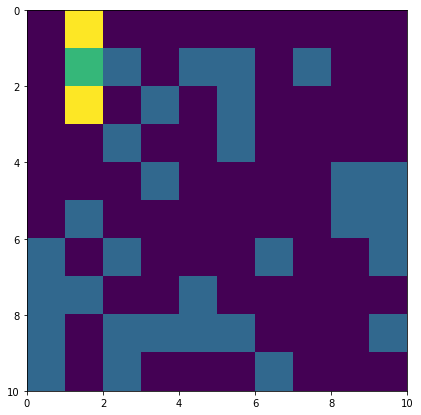

start point: (7, 0)
end point: (9, 4)


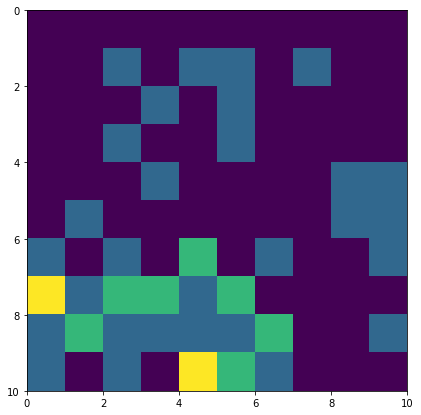

start point: (1, 7)
end point: (6, 5)


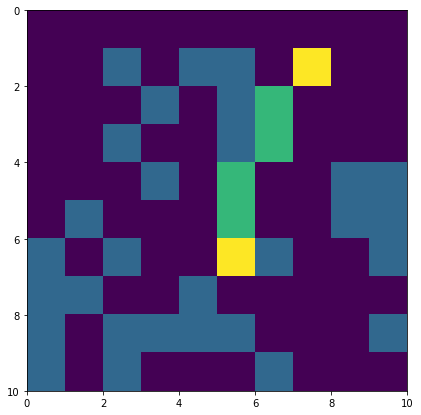

start point: (0, 7)
end point: (1, 3)


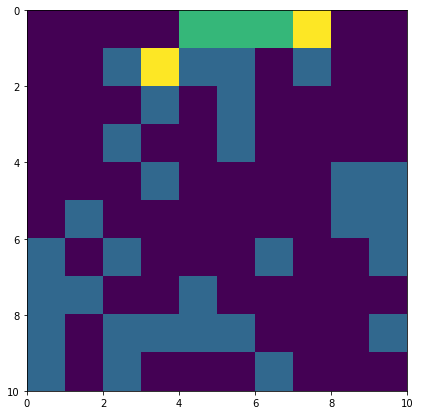

start point: (6, 6)
end point: (1, 6)


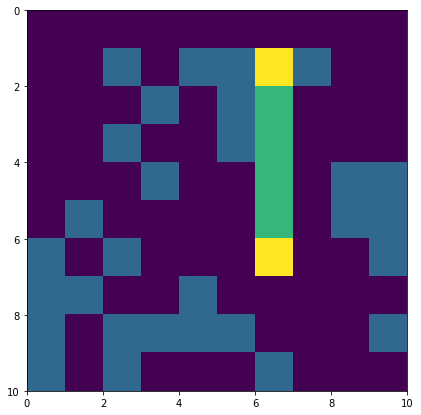

In [17]:
num_iterations = 5

for _ in range(num_iterations):
    grid_copy = copy.deepcopy(grid)  # for drawing
    
    start = tuple(np.random.randint(0, grid_size, 2))
    end = tuple(np.random.randint(0, grid_size, 2))

    print(f'start point: {start}')
    print(f'end point: {end}')

    result = astar(grid_copy, start, end)

    if result is None:
        print('path does not exist\n\n')
    else:
        for i, j in result:
            grid_copy[i][j] = 2
        grid_copy[start[0]][start[1]] = 3
        grid_copy[end[0]][end[1]] = 3
        plot_grid(grid_copy)